# Exploratory Data Analysis (EDA) on Student Performance Dataset

# Submitted By C.Koushik
Email- koushikc2000@gmail.com


In [220]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
dataset=pd.read_csv('StudentsPerformance (3).csv')
print("Columns in the dataset\n",dataset.columns.tolist())
print("\nDatatypes of columns\n",dataset.dtypes)
print("\nNumber of null values\n",dataset.isnull().sum())
print("\nFirst few entries\n",dataset.head())

Columns in the dataset
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Datatypes of columns
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Number of null values
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

First few entries
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C      

<b>
    There are no null values and every row as a valid entry. New columns for total score and average score of the three tests for every student can be added to analyze the relative performance

In [3]:
total_score=(dataset["reading score"]+dataset["writing score"]+dataset["math score"])
avg_score=total_score/3
dataset["total score"]=total_score
dataset["avg score"]=avg_score

In [4]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [5]:
p=dataset["avg score"].min()
q=dataset["avg score"].max()
l=list(dataset["avg score"])

Male and female averages
 [65.83748271092671, 69.56949806949811]


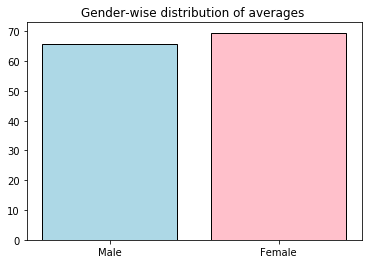

In [6]:
#Gender-wise Distribution of averages

Male_avg=dataset.loc[(dataset["gender"]=='male'),:]["avg score"].mean()
Female_avg=dataset.loc[(dataset["gender"]=='female'),:]["avg score"].mean()
averages=[Male_avg,Female_avg]
gender=["Male","Female"]
print("Male and female averages\n",averages)
plt.bar(gender,averages,color=("lightblue","pink"),edgecolor='black')
plt.title("Gender-wise distribution of averages ")
plt.show()

<b>Here, we can clearly conclude that female students have out-performed male students. Averages being, for Male=65.83 and Female=69.56

In [7]:

print("Student with maximum average score is from group {}".format(list(dataset["race/ethnicity"])[l.index(q)]))
print("Student with minimum average score is from group {}".format(list(dataset["race/ethnicity"])[l.index(p)]))



Student with maximum average score is from group group E
Student with minimum average score is from group group C


Groups
 ['group A', 'group B', 'group C', 'group D', 'group E']

Averages across all the groups
 [62.992509363295866, 65.46842105263156, 67.13166144200628, 69.17938931297705, 72.75238095238097]


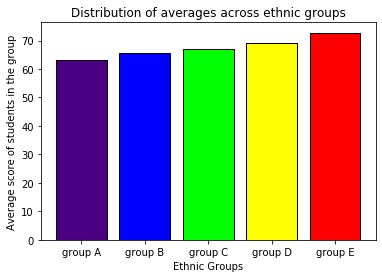

In [8]:
#To plot distribution of averages across the groups
A=dataset.loc[(dataset["race/ethnicity"]=='group A'),:]["avg score"].mean()
B=dataset.loc[(dataset["race/ethnicity"]=='group B'),:]["avg score"].mean()
C=dataset.loc[(dataset["race/ethnicity"]=='group C'),:]["avg score"].mean()
D=dataset.loc[(dataset["race/ethnicity"]=='group D'),:]["avg score"].mean()
E=dataset.loc[(dataset["race/ethnicity"]=='group E'),:]["avg score"].mean()

groups=["group A","group B","group C","group D","group E"]
print("Groups\n",groups)
averages=[A,B,C,D,E]
print("\nAverages across all the groups\n",averages)
plt.bar(groups,averages,color=("indigo","blue","lime","yellow","red"), edgecolor="black")
plt.xlabel("Ethnic Groups")
plt.ylabel("Average score of students in the group")
plt.title("Distribution of averages across ethnic groups")
plt.show()

<b>From the above bar plot, we can conclude that students from group E have performed better than students from other groups by taking average score as a statistical measure.

In [9]:
#General info of modified dataset
print("General info and description\n")
print(dataset.info())
print(dataset.describe())
print("\nDimensions- ",dataset.shape)

General info and description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   avg score                    1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB
None
       math score  reading score  writing score  total score    avg score
count  1000.00000    1000.

<b>math score, reading score, writing score, total score and avg score are numerical variables

gender, lunch, test preparation course, parent's education, race/ethnicity are categorical variables

Labels
 ['Not taken training', 'Training taken']

Averages
 [65.03894080996888, 72.66945996275605]


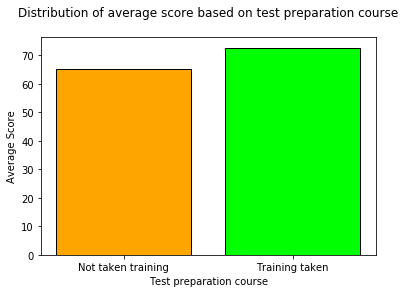

In [10]:
#Distribution of average scores based on test preparation course
N=dataset.loc[(dataset["test preparation course"]=='none'),:]["avg score"].mean()
C=dataset.loc[(dataset["test preparation course"]=='completed'),:]["avg score"].mean()
averages=[N,C]
labels=["Not taken training","Training taken"]
print("Labels\n",labels)
print("\nAverages\n",averages)
plt.title("Distribution of average score based on test preparation course\n")
plt.bar(labels,averages,color=("orange","lime"),edgecolor='black')
plt.ylabel("Average Score")
plt.xlabel("Test preparation course")
plt.show()

<b>We can infer than a student performs better when he undergoes test preparation through training thus showing a significant difference.

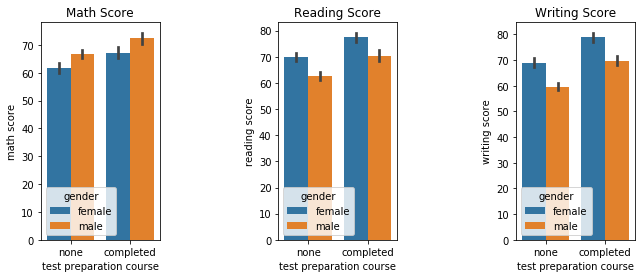

In [11]:
#Distribution of scores across Math, Reading and Writing based on Gender
plt.subplot(131)
plt.title("Math Score")
sn.barplot(x="test preparation course",y="math score",data=dataset,hue="gender")
plt.subplot(132)
plt.title("Reading Score")
sn.barplot(x="test preparation course",y="reading score",data=dataset,hue="gender")
plt.subplot(133)
plt.title("Writing Score")
sn.barplot(x="test preparation course",y="writing score",data=dataset,hue="gender")
plt.subplots_adjust(right=1.5,wspace=1)
plt.show()


Relationship between scores and test preparation course from the above plot can be derived as follows;

In addition to our inference of test preparation course having a positive impact on overall score:
    <p><b>1. Male students who have not undertaken the training and female students who have completed the course have performed equally
    well in maths</p>
    <p>2. Both female and male students who have completed training have out-perfomed others in both reading and writing.</p>

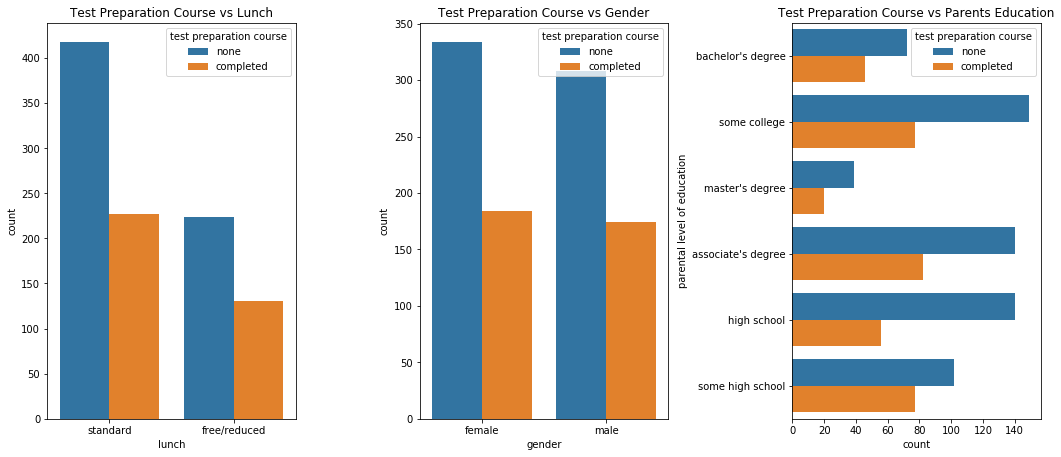

In [12]:
plt.subplots_adjust(right=2.8,wspace=0.5,top=1.5,left=0.5)
plt.subplot(131)
plt.title("Test Preparation Course vs Lunch")
sn.countplot(x="lunch",data=dataset,hue="test preparation course")
plt.subplot(132)
plt.title("Test Preparation Course vs Gender")
sn.countplot(x="gender",data=dataset,hue="test preparation course")
plt.subplot(133)
plt.title('Test Preparation Course vs Parents Education')
sn.countplot(hue="test preparation course",y="parental level of education",data=dataset)
plt.show()

From the above graphs we can infer that:- <br><br><b>
1) More female students have not completed the course prep. even though the relatively performed better than male students.<br><br>
2) Majority of students have taken standard lunch as their lunch option

In [13]:
"""Calculating correlation coefficients between tables to 
understand the significant relationships between the variables"""
dataset.corr()

,math score,reading score,writing score,total score,avg score
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
total score,0.918746,0.970331,0.965667,1.000000,1.000000
avg score,0.918746,0.970331,0.965667,1.000000,1.000000


<b>
    1. From the above correlation table, we can see that the correlation coefficient of (reading, writing) score is 0.954 which is close to 1. Hence, it implies that students who performed well in reading have also performed equally well in writing and vice versa.<br><br>
    2. Correlation Coefficient (reading, total score) is the highest (0.970) which means, reading score contributes more to the total score and students have found reading easier than math and writing.<br><br>
    3. Math score contributes least to the total score relatively.

# Assigning Grades based on Total Score

In [14]:
dataset["%"]=(dataset["total score"]/300)*100

In [15]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score,%
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [16]:
def grades(percent):
    if percent>=85 and percent<=100:
        return "Grade S"
    elif percent>=70 and percent<85:
        return "Grade A"
    elif percent>=55 and percent<70:
        return "Grade B"
    elif percent>=35 and percent<55:
        return "Grade C"
    elif percent<35:
        return "Grade F"
dataset['grades']=dataset['%'].apply(grades)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score,%,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667,Grade A
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333,Grade A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667,Grade S
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333,Grade C
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333,Grade A


<b>The grades are assigned from S to F, S being the highest and F denotes a fail

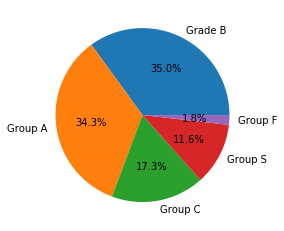

In [17]:
cnt=dataset['grades'].value_counts()
grades=['Grade B','Group A','Group C','Group S','Group F']
plt.pie(cnt,labels=grades,autopct='%1.1f%%')
plt.show()

<b>
    Majority of students have secured B grade (scored between 70 and 85). Only 11.6% students scored the highest S grade. 1.8% students have scored poorly,  below 35% and have obtained F grade

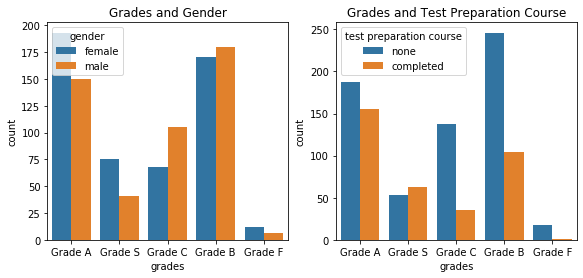

In [18]:
plt.subplots_adjust(right=1.35)
plt.subplot(121)
plt.title("Grades and Gender")
sn.countplot(x='grades',data=dataset,hue="gender")
plt.subplot(122)
plt.title("Grades and Test Preparation Course")
sn.countplot(x='grades',data=dataset,hue='test preparation course')
plt.show()

<b>
    Grades as a performance metric:<br><br>
    1. Female Students performed better than male students overall, scoring more S, A and B grades.<br>
    2. Students who completed test preparation course scored more S grades.<br>
    3. Very few students (almost negligible) who completed test preparation course failed (F Grade).
    

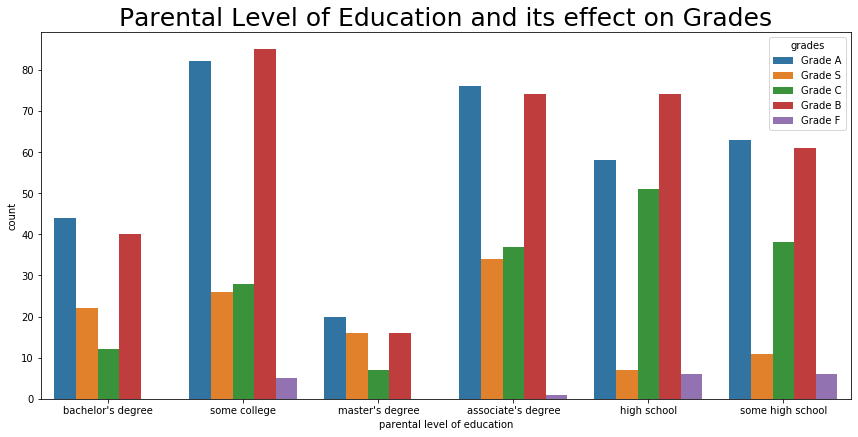

In [19]:
plt.subplots_adjust(right=2, top=1.4)
plt.subplot(111)
plt.title("Parental Level of Education and its effect on Grades", fontsize=25)
sn.countplot(x="parental level of education", data=dataset, hue="grades")
plt.show()

<b>
    1. Students whose parents hold an associate's degree have secured more S grades. <br>
    2. Students whose parents hold bachelor's degree and master's degree, haven't failed (No F Grades).<br>
    3. Students whose parents have some college degree secured most number of A and B grades.<br>
    

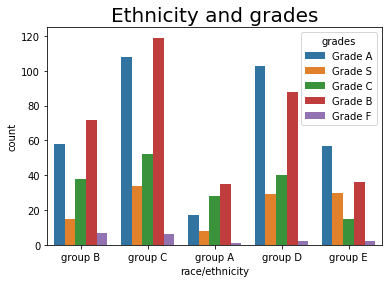

In [20]:
plt.title('Ethnicity and grades', fontsize=20)
sn.countplot(x="race/ethnicity", data=dataset, hue='grades')
plt.show()

<b> 
    Group C has the highest number of S grades, A grades, B grades. Which means Group C has the best performance. But this statement is a contradiction when taking average as a performance metric. However, since grade provides the best representation in general as a performance metric, we can conclude that group C's performance is the best, overall
    

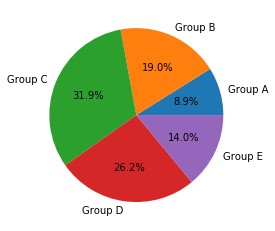

In [21]:
#Plot percentage of number of students in each group 

countA, countB, countC, countD, countE = 0, 0, 0, 0, 0
X=dataset.iloc[:,1:].values
groups=X[:,0]
for grp in groups:
    if grp=="group A":
        countA+=1
    elif grp=="group B":
        countB+=1
    elif grp=="group C":
        countC+=1
    elif grp=="group D":
        countD+=1
    elif grp=="group E":
        countE+=1

counts=[countA,countB,countC,countD,countE]
grps=['Group A','Group B','Group C','Group D','Group E']

plt.pie(counts, labels=grps, autopct='%1.1f%%')
plt.show()

<b>
    <li>Majority of students are from group C.<br>
    <li>Group A has the least number of students.

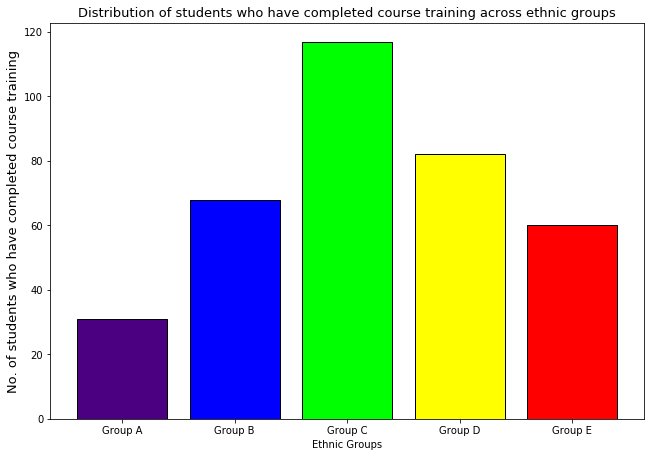

In [22]:
#Distribution of Students who have completed the course training

completion_status=X[:,[0,3]]
CountA,CountB,CountC,CountD,CountE=0,0,0,0,0

for status in completion_status:
    if status[0]=='group A' and status[1]=='completed':
        CountA+=1
    elif status[0]=='group B' and status[1]=='completed':
        CountB+=1
    elif status[0]=='group C' and status[1]=='completed':
        CountC+=1
    elif status[0]=='group D' and status[1]=='completed':
        CountD+=1
    elif status[0]=='group E' and status[1]=='completed':
        CountE+=1
    elif status[0]=='group F' and status[1]=='completed':
        CountF+=1

counts=[CountA, CountB, CountC, CountD, CountE]
groups=['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
plt.bar(groups,counts,color=("indigo","blue","lime","yellow","red"), edgecolor="black")
plt.xlabel("Ethnic Groups")
plt.ylabel("No. of students who have completed course training",fontsize=13)
plt.title("Distribution of students who have completed course training across ethnic groups",fontsize=13)
plt.subplots_adjust(top=1.5,right=1.5)
plt.show()

<b>
    <li>Most number of students to have completed course training are from group C.
    <li>Least Number from group A.
    <li>As per our previous inference, this proves that taking test preparation course has a direct impact on grades. Group C performing better than the rest.

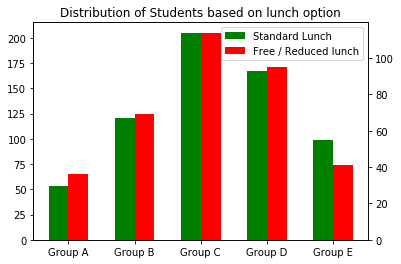

In [39]:
#Distribution of students based on lunch option

lunch=X[:,[0,2]]
standard_a, standard_b, standard_c, standard_d, standard_e=0,0,0,0,0
reduced_a, reduced_b, reduced_c, reduced_d, reduced_e=0,0,0,0,0
for opt in lunch:
    if opt[0]=='group A':
        if opt[1]=='standard':
            standard_a+=1
        else:
            reduced_a+=1
    if opt[0]=='group B':
        if opt[1]=='standard':
            standard_b+=1
        else:
            reduced_b+=1
    if opt[0]=='group C':
        if opt[1]=='standard':
            standard_c+=1
        else:
            reduced_c+=1
    if opt[0]=='group D':
        if opt[1]=='standard':
            standard_d+=1
        else:
            reduced_d+=1
    if opt[0]=='group E':
        if opt[1]=='standard':
            standard_e+=1
        else:
            reduced_e+=1

standard=[standard_a,standard_b,standard_c,standard_d,standard_e]
reduced=[reduced_a,reduced_b,reduced_c,reduced_d,reduced_e]
groups=["Group A","Group B","Group C","Group D","Group E"]
ax1=plt.subplot(1,1,1)
plt.xticks(np.arange(5)+0.15,groups)
grp=ax1.bar(np.arange(5),standard,width=0.3,color='g')
ax2=ax1.twinx()
lun=ax2.bar(np.arange(5)+0.3,reduced,width=0.3,color='r')
plt.legend([grp, lun],['Standard Lunch', 'Free / Reduced lunch'])
plt.title("Distribution of Students based on lunch option")
plt.show()

<b>
    <li>In group C, equal number of students have chosen Standard and Free lunch.
    <li> Group C has the highest number of standard lunch.
    <li> Can draw a parallel and conclude that students who chose Standard lunch have performed well.

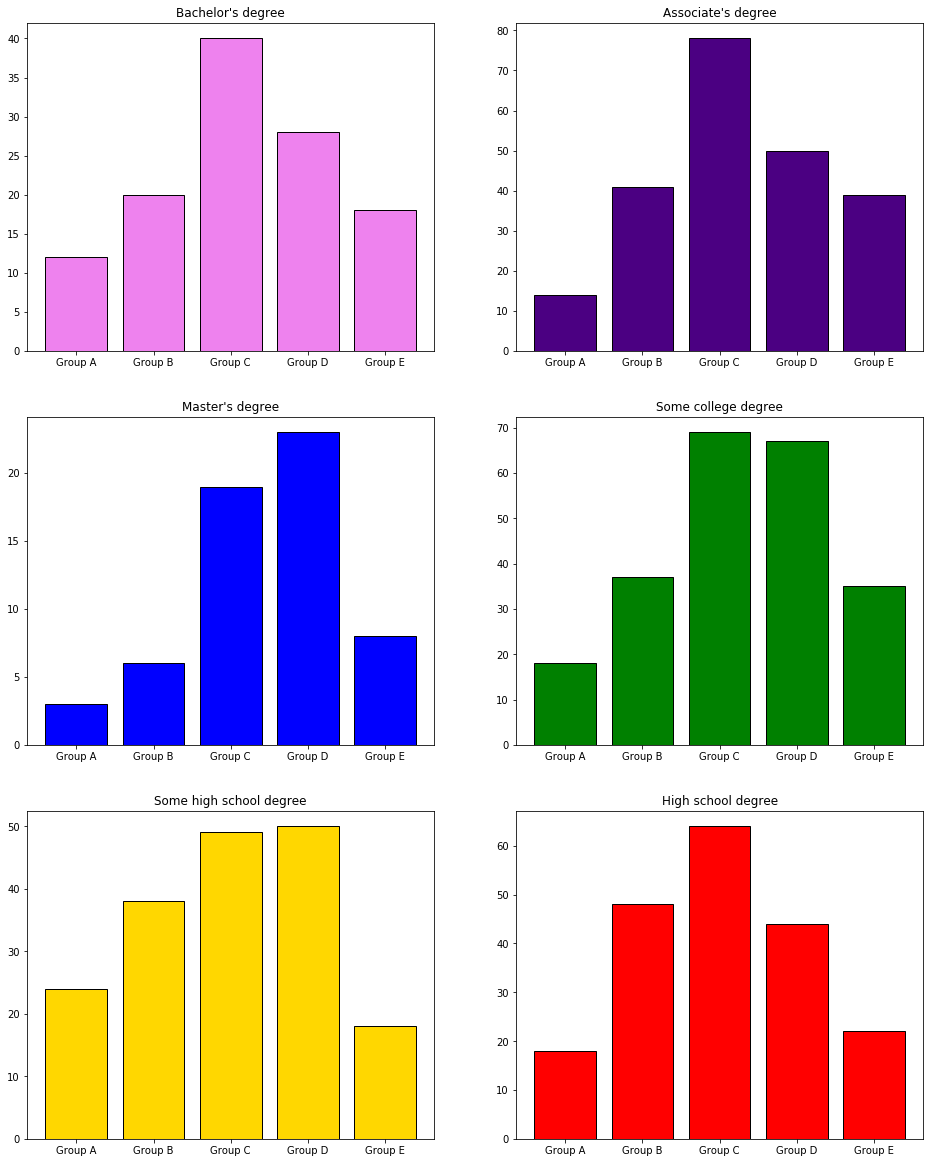

In [97]:
#Distribution of students based on parental education across the ethnic groups
parent=X[:,[0,1]]

bachelor=[0,0,0,0,0]
associate=[0,0,0,0,0]
master=[0,0,0,0,0]
highS=[0,0,0,0,0]
someC=[0,0,0,0,0]
someH=[0,0,0,0,0]

for i in parent:
    if i[0]=='group A':
        if i[1]=="bachelor's degree":
            bachelor[0]+=1
        elif i[1]=="associate's degree":
            associate[0]+=1
        elif i[1]=="master's degree":
            master[0]+=1
        elif i[1]=="high school":
            highS[0]+=1
        elif i[1]=="some college":
            someC[0]+=1
        elif i[1]=="some high school":
            someH[0]+=1

    elif i[0]=='group B':
        if i[1]=="bachelor's degree":
            bachelor[1]+=1
        elif i[1]=="associate's degree":
            associate[1]+=1
        elif i[1]=="master's degree":
            master[1]+=1
        elif i[1]=="high school":
            highS[1]+=1
        elif i[1]=="some college":
            someC[1]+=1
        elif i[1]=="some high school":
            someH[1]+=1

    elif i[0]=='group C':
        if i[1]=="bachelor's degree":
            bachelor[2]+=1
        elif i[1]=="associate's degree":
            associate[2]+=1
        elif i[1]=="master's degree":
            master[2]+=1
        elif i[1]=="high school":
            highS[2]+=1
        elif i[1]=="some college":
            someC[2]+=1
        elif i[1]=="some high school":
            someH[2]+=1

    elif i[0]=='group D':
        if i[1]=="bachelor's degree":
            bachelor[3]+=1
        elif i[1]=="associate's degree":
            associate[3]+=1
        elif i[1]=="master's degree":
            master[3]+=1
        elif i[1]=="high school":
            highS[3]+=1
        elif i[1]=="some college":
            someC[3]+=1
        elif i[1]=="some high school":
            someH[3]+=1
            
    elif i[0]=='group E':
        if i[1]=="bachelor's degree":
            bachelor[4]+=1
        elif i[1]=="associate's degree":
            associate[4]+=1
        elif i[1]=="master's degree":
            master[4]+=1
        elif i[1]=="high school":
            highS[4]+=1
        elif i[1]=="some college":
            someC[4]+=1
        elif i[1]=="some high school":
            someH[4]+=1

plt.subplots_adjust(right=2.2,top=4)
plt.subplot2grid((3,2),(0,0))
plt.bar(groups,bachelor,color="violet",edgecolor="black")
plt.title("Bachelor's degree")

plt.subplot2grid((3,2),(0,1))
plt.bar(groups,associate,color="indigo",edgecolor="black")
plt.title("Associate's degree")

plt.subplot2grid((3,2),(1,0))
plt.bar(groups,master,color="blue",edgecolor="black")
plt.title("Master's degree")

plt.subplot2grid((3,2),(1,1))
plt.bar(groups,someC,color="green",edgecolor="black")
plt.title("Some college degree")

plt.subplot2grid((3,2),(2,0))
plt.bar(groups,someH,color="gold",edgecolor="black")
plt.title("Some high school degree")

plt.subplot2grid((3,2),(2,1))
plt.bar(groups,highS,color="red",edgecolor="black")
plt.title("High school degree")

plt.show()

<b>
    <center>These plots show the distribution of students based on parental education across the ethnic groups.</center>
    <br>We can conclude that,
    <li>Group C has the highest number of parental degrees.
    <li>Group A has the lowest number of parental degrees.
    <li>From our previous inferences, we found out that students whose parents have assosicate's degree secured more S grades and less D grades. These plots support the same.
    <li>We also found that students whose parents have some college degree scored more A and B grades. These plots confirm the statements made earlier. Thus also explains the overall performance of group C.
    <li>Group A students also under-performed when compared to the rest, which is evident from these plots.
    <br><br>
Thus, parental education does have an impact on how the students perform.

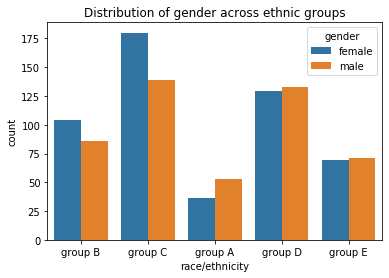

In [124]:
sn.countplot(x="race/ethnicity",data=dataset,hue="gender")
plt.title("Distribution of gender across ethnic groups")
plt.show()

<b>
    <li>Group C contains the highest number of females thus it explains the best performance of students in Group C.
    <li>Group A contains the lowest number of females and thus explains the under-performance of group A students.

# Distribution of Scores

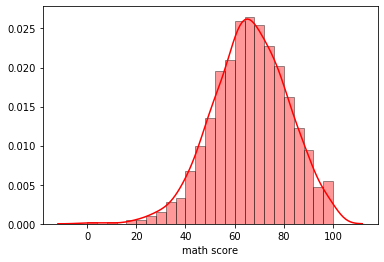

In [114]:
#Math score
sn.distplot(dataset["math score"],color='red',hist_kws=dict(linewidth=1,edgecolor='black'))
plt.show()

<b>
    From the above distribution it can be seen that, maximum number of students have score around 60-80 marks in math. Max score is 100 and min score is 0.

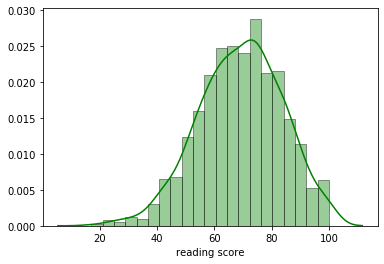

10

In [125]:
#Reading score
sn.distplot(dataset["reading score"],color='green',hist_kws=dict(linewidth=1,edgecolor='black'))
plt.show()

<b>From the distribution of reading scores, many students have secured marks in the range 58-80.
Minimum score being 17 and max being 100.

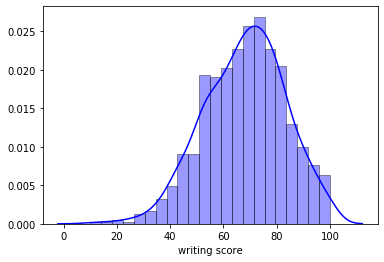

In [122]:
#Writing score
sn.distplot(dataset["writing score"],color='blue',hist_kws=dict(linewidth=1,edgecolor='black'))
plt.show()

<b>
    From the above distribution it can be seen that, maximum number of students have score around 64-80 marks in writing. Max score is 100 and min score is 10.

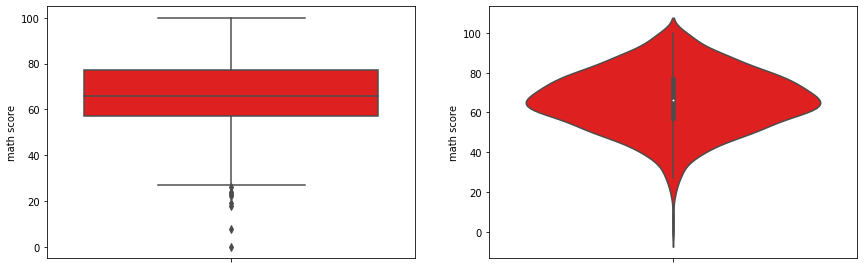

In [158]:
#box plot and violin plot for math scores
plt.subplots_adjust(right=2,top=1)
plt.subplot(121)
sn.boxplot(y="math score",data=dataset,color="red")
plt.subplot(122)
sn.violinplot(y="math score",data=dataset,color="red")
plt.show()

In [198]:
print("Some important stats\n")
print("Mean: ",np.mean(dataset["math score"]))
print("Median: ",np.median(dataset["math score"]))
print("Mode: ",stats.mode(dataset["math score"]))
print("1st Quartile Q1: ",np.quantile(dataset["math score"],0.25))
print("2nd Quartile Q2: ",np.quantile(dataset["math score"],0.50))
print("3rd Quartile Q3: ",np.quantile(dataset["math score"],0.75))
print("Max Score: ",max(dataset["math score"]))
print("Min Score: ",min(dataset["math score"]))

Some important stats

Mean:  66.089
Median:  66.0
Mode:  ModeResult(mode=array([65], dtype=int64), count=array([36]))
1st Quartile Q1:  57.0
2nd Quartile Q2:  66.0
3rd Quartile Q3:  77.0
Max Score:  100
Min Score:  0


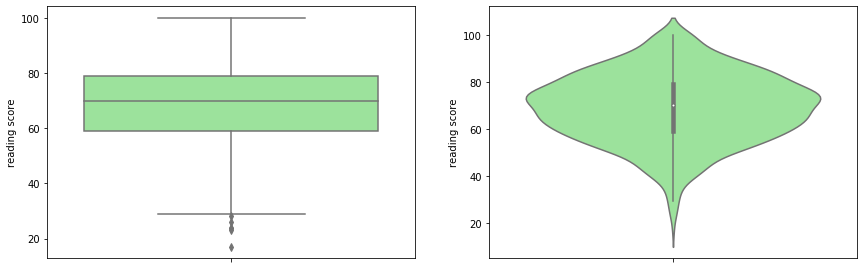

In [171]:
#box plot and violin plot for reading scores
plt.subplots_adjust(right=2,top=1)
plt.subplot(121)
sn.boxplot(y="reading score",data=dataset,color="lightgreen")
plt.subplot(122)
sn.violinplot(y="reading score",data=dataset,color="lightgreen")
plt.show()

In [199]:
print("Some important stats\n")
print("Mean: ",np.mean(dataset["reading score"]))
print("Median: ",np.median(dataset["reading score"]))
print("Mode: ",stats.mode(dataset["reading score"]))
print("1st Quartile Q1: ",np.quantile(dataset["reading score"],0.25))
print("2nd Quartile Q2: ",np.quantile(dataset["reading score"],0.50))
print("3rd Quartile Q3: ",np.quantile(dataset["reading score"],0.75))
print("Max Score: ",max(dataset["reading score"]))
print("Min Score: ",min(dataset["reading score"]))

Some important stats

Mean:  69.169
Median:  70.0
Mode:  ModeResult(mode=array([72], dtype=int64), count=array([34]))
1st Quartile Q1:  59.0
2nd Quartile Q2:  70.0
3rd Quartile Q3:  79.0
Max Score:  100
Min Score:  17


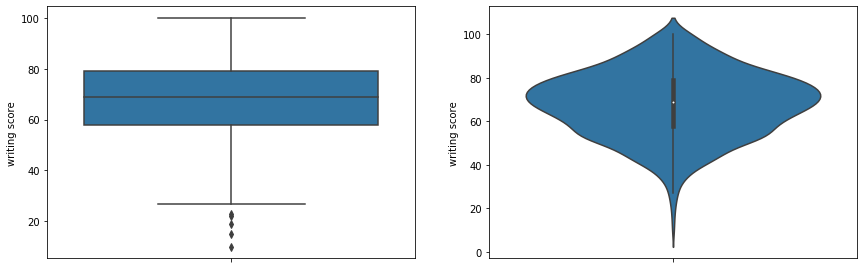

In [172]:
#box plot and violin plot for writing scores
plt.subplots_adjust(right=2,top=1)
plt.subplot(121)
sn.boxplot(y="writing score",data=dataset)
plt.subplot(122)
sn.violinplot(y="writing score",data=dataset)
plt.show()

In [200]:
print("Some important stats\n")
print("Mean: ",np.mean(dataset["writing score"]))
print("Median: ",np.median(dataset["writing score"]))
print("Mode: ",stats.mode(dataset["writing score"]))
print("1st Quartile Q1: ",np.quantile(dataset["writing score"],0.25))
print("2nd Quartile Q2: ",np.quantile(dataset["writing score"],0.50))
print("3rd Quartile Q3: ",np.quantile(dataset["writing score"],0.75))
print("Max Score: ",max(dataset["writing score"]))
print("Min Score: ",min(dataset["writing score"]))

Some important stats

Mean:  68.054
Median:  69.0
Mode:  ModeResult(mode=array([74], dtype=int64), count=array([35]))
1st Quartile Q1:  57.75
2nd Quartile Q2:  69.0
3rd Quartile Q3:  79.0
Max Score:  100
Min Score:  10


### <center> The above graphs and statistical measures prove the statements made earlier

# Group-wise distribution of scores


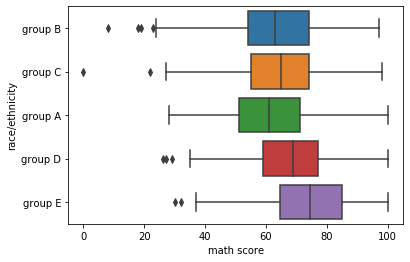

In [202]:
sn.boxplot(x="math score",y="race/ethnicity",data=dataset)
plt.show()

<b>
    Group E has done relatively well in maths compared to the other group. Thus|, group E has overall better average in maths. Group A has the least overall average since the box is shifted towards left.

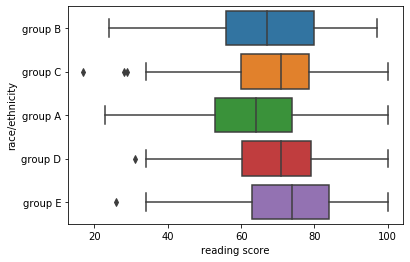

In [203]:
sn.boxplot(x="reading score",y="race/ethnicity",data=dataset)
plt.show()

<b> 
    The box plot of Group C is shifted right more. Thus explains the high performance of Group C.

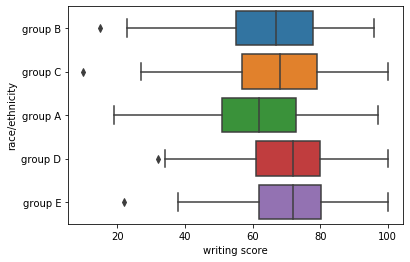

In [204]:
sn.boxplot(x="writing score",y="race/ethnicity",data=dataset)
plt.show()

<b>Group A is shifted left more and hence group A as low performance in writing score.
Group E has better performance in writing score.

<b>
    The overall performance seems to be better in group E, but since group C has most number of students, the weightage is reflected more in group C. Therefore Group C having the best overall performance.

In [208]:
print(dataset.corr())

               math score  reading score  writing score  total score  \
math score       1.000000       0.817580       0.802642     0.918746   
reading score    0.817580       1.000000       0.954598     0.970331   
writing score    0.802642       0.954598       1.000000     0.965667   
total score      0.918746       0.970331       0.965667     1.000000   
avg score        0.918746       0.970331       0.965667     1.000000   
%                0.918746       0.970331       0.965667     1.000000   

               avg score         %  
math score      0.918746  0.918746  
reading score   0.970331  0.970331  
writing score   0.965667  0.965667  
total score     1.000000  1.000000  
avg score       1.000000  1.000000  
%               1.000000  1.000000  


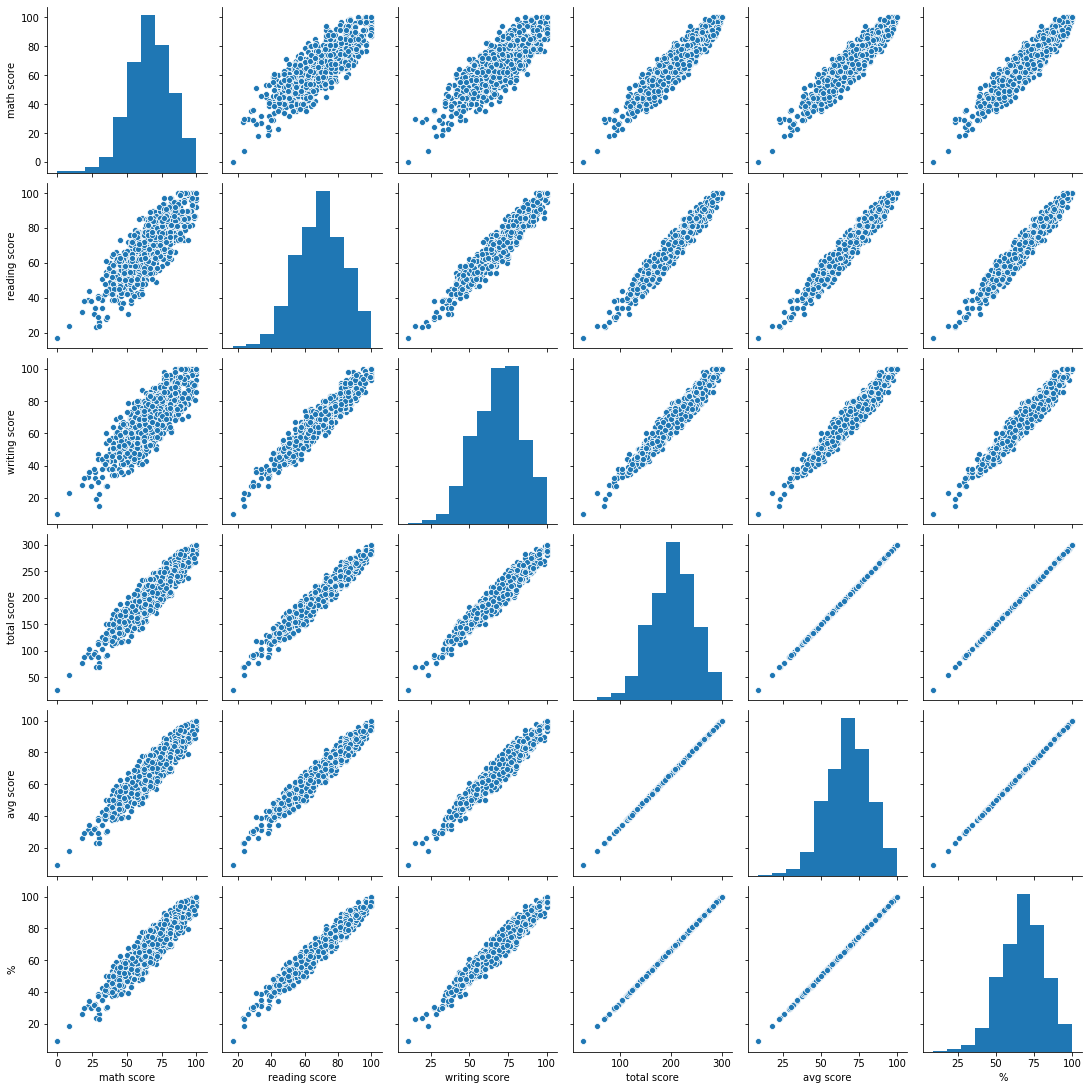

In [210]:
sn.pairplot(data=dataset)
plt.show()

<b>
    Correlation represents how closely related an attribute is with respect to another. The following matrix of plots shows pairwise dependencies of numerical variables.<br>
   <p> 
    If correlation coeff. is close to 1, they're positively correlated.<br>
    If correlation coeff. is close to 0, they're not related.<br>
    If correlation coeff. is close to -1, they're negatively correlated.<br></p>

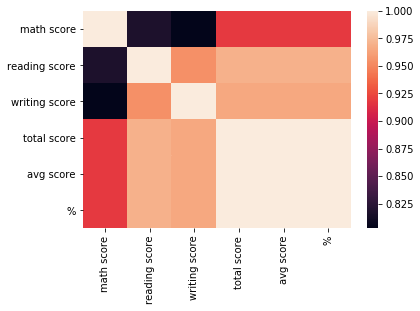

In [224]:
sn.heatmap(dataset.corr())
plt.show()

<b>
    Heatmap of dependency of numerical variables with each other based on correlation coefficient.

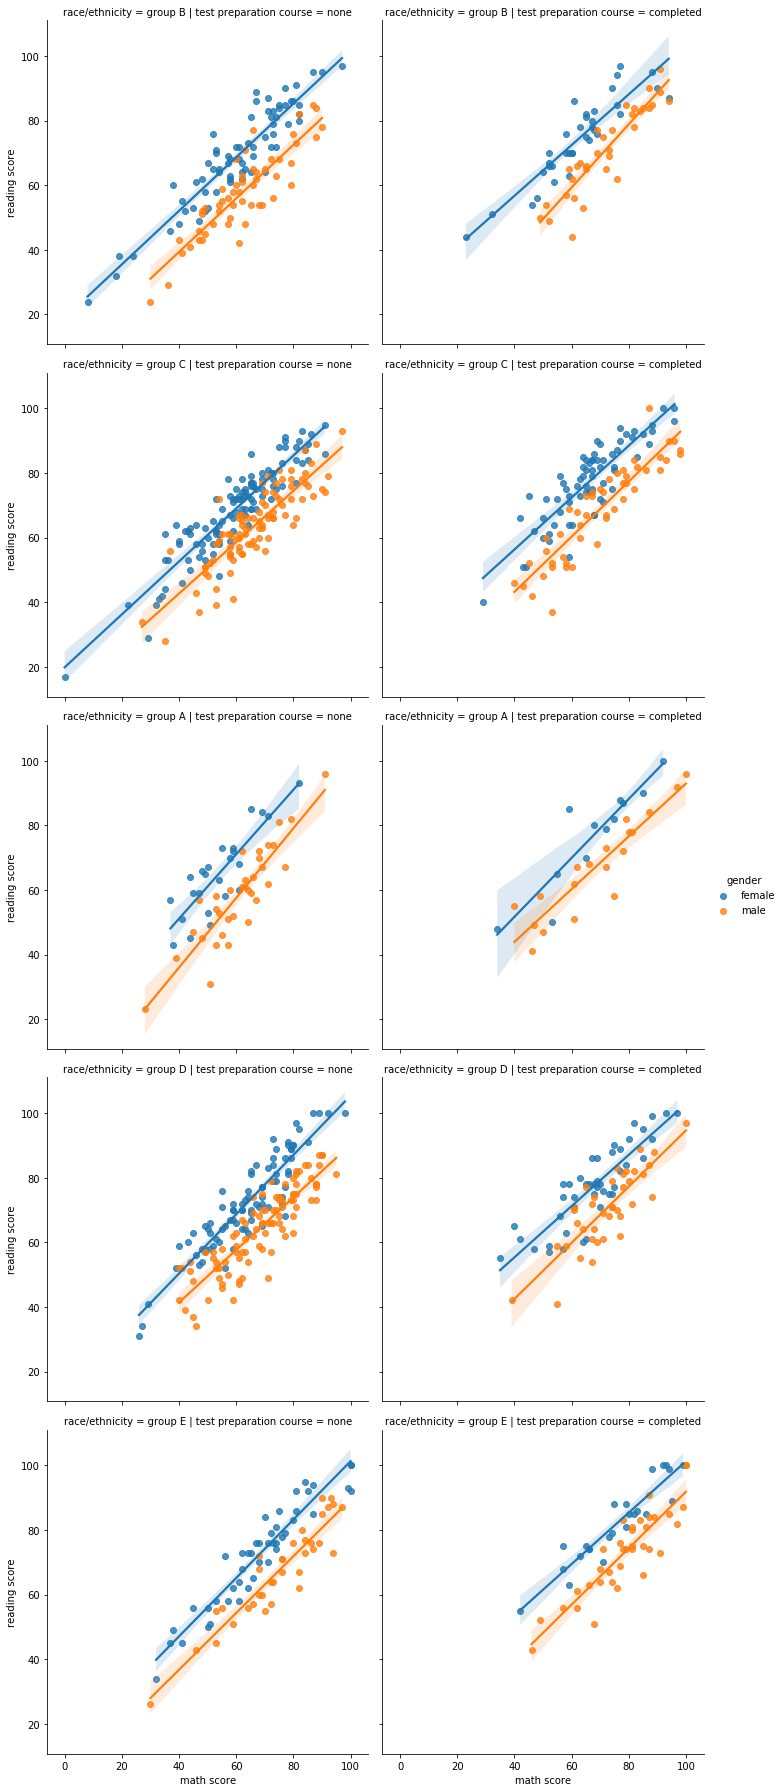

In [227]:
sn.lmplot('math score', 'reading score', data=dataset, hue="gender", col='test preparation course', row='race/ethnicity')
plt.show()


<b>
    The above plots show the relationship between math and reading score for each group and also plots the best fit line.

# Distribution of Categorical Data

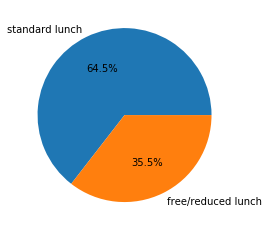

In [242]:
lunch=["standard lunch","free/reduced lunch"]
plt.pie(dataset["lunch"].value_counts(),labels=lunch,autopct="%1.1f%%")
plt.show()

<b>
    Majority of students have opted for standard lunch

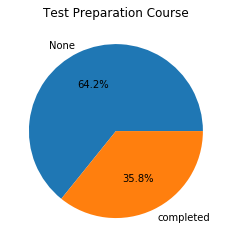

In [249]:
plt.title("Test Preparation Course")
prep=["None","completed"]
plt.pie(dataset["test preparation course"].value_counts(),labels=prep,autopct="%1.1f%%")
plt.show()


<b>
    Majority of students did not take test preparation course

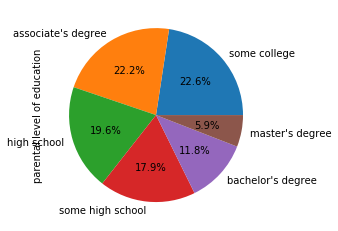

In [259]:
dataset["parental level of education"].value_counts().plot(kind="pie",autopct="%1.1f%%")

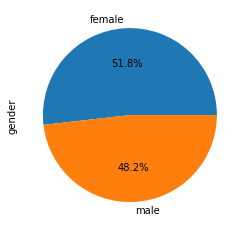

In [260]:
dataset["gender"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<b>Majority are female students.